In [1]:
from sklearn.datasets import load_wine
from matplotlib.pyplot import *
from numpy import *
wine = load_wine()
data = wine.data

In [2]:

xMax = amax(data,axis=0)
xMin = amin(data,axis=0)
labels = wine.target
bins = 5
means = []
variances = []
N = []

In [3]:

def prob(x):
    pList = []
    guessP = 0.5
    guess = None
    S = 0
    for c in range(3):
        mu = means[c]
        v = variances[c]
        Max = (2*pi*v)**(-0.5)
        p = exp(-((x-mu)**2) / (2*v))*Max
        p = product(p) * N[c]/sum(N)
        pList.append(p)
        S += p
    for c in range(3):
        if(pList[c]/S > guessP):
            guessP = pList[c]/S
            guess = c
    return guess


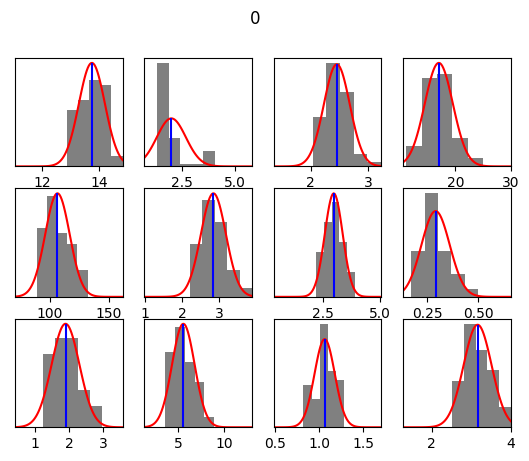

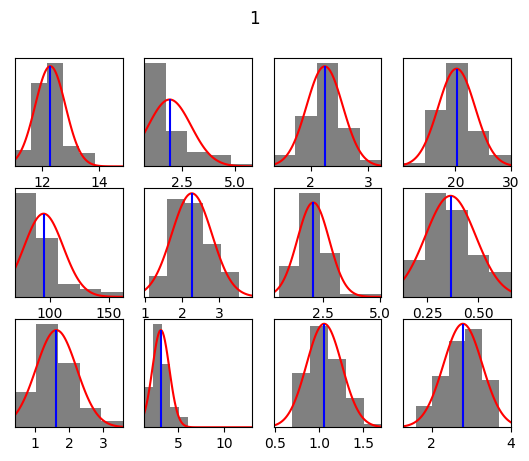

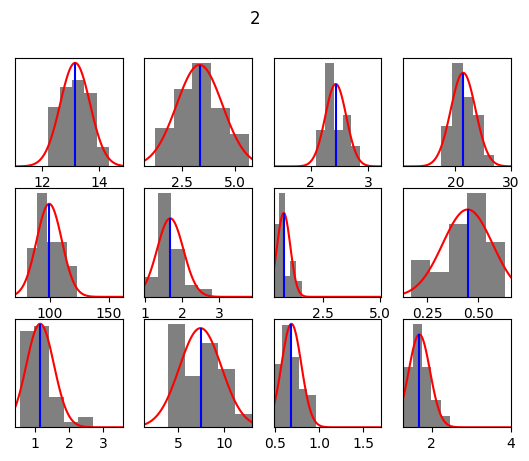

In [4]:

for c in range(3):
    figure()
    X = data[labels==c]
    N.append(X.shape[0])
    mu = mean(X,axis=0)
    v = var(X,axis=0)
    means.append(mu)
    variances.append(v)
    for i in range(12):
        subplot(3,4,i+1)
        x = X[:,i]
        p,xvals = histogram(x,bins)
        xvals = xvals[:-1]
        binWidth = xvals[1]-xvals[0]
        p = p/(x.shape[0]*binWidth)
        bar(xvals+binWidth/2,p,binWidth,color="gray")
        x = linspace(xMin[i],xMax[i],100)
        Max = (2*pi*v[i])**(-0.5)
        p = exp(-((x-mu[i])**2) / (2*v[i]))*Max
        plot(x,p,"red")
        vlines([mu[i]],0,Max,['blue'])
        yticks([])
        xlim([xMin[i],xMax[i]])
    suptitle(c)
show()


In [5]:

correct = 0
incorrect = 0
for i in range(sum(N)):
    guess = prob(data[i])
    if(guess!=None):
        if(guess==labels[i]):
            correct += 1
        else:
            incorrect += 1
print(100*correct/(correct+incorrect))
print(100*(correct+incorrect)/sum(N))
print(N)

98.87640449438203
100.0
[59, 71, 48]


In [6]:
for i in random.randint(0,sum(N),10):
    d = data[i]+(random.random(13)-0.5)*xMax/10
    print(prob(d),'',labels[i],'',(100*d/xMax).round(1),'\n')

0  0  [95.  32.5 70.6 66.4 59.2 69.  53.4 44.6 63.3 48.8 59.1 71.4 66.4] 

2  2  [82.4 41.1 70.7 61.5 50.4 40.7 12.4 72.4 14.2 73.7 35.8 44.8 30.7] 

1  1  [87.6 78.6 88.2 83.7 61.4 53.  41.2 65.7 48.5 19.7 55.3 76.2 18. ] 

2  2  [91.5 71.4 78.2 77.3 64.2 43.8 16.6 67.5 34.8 57.6 39.1 38.4 47.6] 

0  0  [92.8 33.5 66.6 53.2 63.4 84.2 70.1 33.1 56.9 50.5 49.6 87.8 59.4] 

2  2  [88.8 66.1 69.4 76.1 64.4 40.9 24.2 20.8 26.7 40.9 45.2 28.7 30.9] 

2  2  [96.8 46.1 76.2 78.  59.9 34.2 11.3 64.9 28.7 73.7 38.7 37.4 33.8] 

2  2  [91.8 46.8 75.3 64.7 56.7 38.2  6.2 61.  16.  38.7 37.7 63.3 51.3] 

1  1  [81.7 35.9 68.2 61.6 64.2 77.9 46.  24.7 42.2 24.7 67.6 74.5 19.2] 

1  1  [76.6 21.3 80.  72.5 51.1 64.9 44.8 60.3 30.8 26.5 54.8 78.5 23.5] 

